# Bibliotecas e constantes

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import scipy as sp # biblioteca para transformada de fourier
import control as ct
from scipy import interpolate
from control.matlab import *
import Polinomial as pol
s = ct.TransferFunction.s
z = ct.TransferFunction.z
%matplotlib inline

sin = np.sin
pi = np.pi

1

2

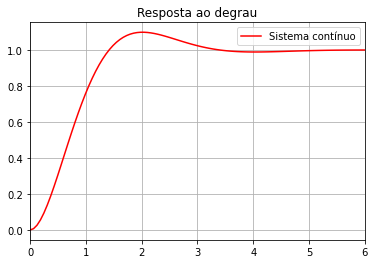

In [3]:
os = 10
ts = 3.5
zeta = (-np.log(os/100))/(np.sqrt(pi**2 + np.log(os/100)**2))
Wn = 4/(ts*zeta)
Xi = 0.375                                #Posição do ator
Vs = Xi*(2.5/1.5) + 2.5                    #Tensão no sensor (de 0 a 5, sendo 2,5 o meio)
K = (Vs-2.5)/(2.5)                      #Sensor de posição influenciando no ganho
G = (Wn**2)/(s**2 + 2*Wn*zeta*s + Wn**2) #Função de transferência da câmera
Gs = K*G
tc, yc = ct.step_response(G)

plt.figure(1)
plt.title("Resposta ao degrau")
plt.plot(tc.T, yc.T,'r',label='Sistema contínuo')
plt.xlim(0,6)
#plt.ylim(0,1.2)
plt.legend()
plt.grid()


3

In [4]:
Ts = 0.1
dt = Ts/30
Gz = c2d(G,dt)

syl1 = pol.SylvesterZ(Gz)
print(Gz)
Cz = syl1.C(0.08,0.11,dt)
Gz


2.071e-05 z + 2.066e-05
-----------------------
z^2 - 1.992 z + 0.9924

dt = 0.0033333333333333335




2.071e-05 z + 2.066e-05
-----------------------
z^2 - 1.992 z + 0.9924

dt = 0.0033333333333333335

{'RiseTime': 0.013333333333333332,
 'SettlingTime': 0.1,
 'SettlingMin': 0.9489530712108166,
 'SettlingMax': 1.1940783952657346,
 'Overshoot': 19.60339985757554,
 'Undershoot': 0.0,
 'Peak': 1.1940783952657346,
 'PeakTime': 0.03666666666666667,
 'SteadyStateValue': 0.9983649266556389}

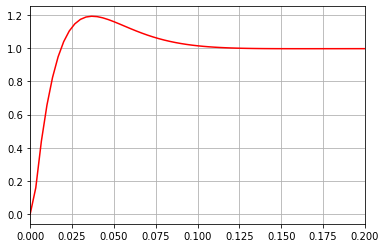

In [146]:
t = np.arange(0,10,dt)
MF = feedback(Cz*Gz)
t, y  = ct.step_response(MF,T=t)

plt.figure(1)
plt.plot(t.T, y.T,'r')
plt.xlim(0,0.2)
#plt.ylim(0,1.5)
plt.grid()

stepinfo(MF,T=t)